# Unsupervised Learning  with kmeans clustering algorithm

In [10]:
data(iris)
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


## Algorithm (in French):

Etant donné k-points aléatoirement choisis $\ m_{1}, m_{2}, ..., m_{k} $

* **Etape 1:** On calcule la distance entre tous points $\ x_{j} $ par rapport à ces k-points
* **Etape 2:** Pour un point $\ m_{k_{i}} $ parmi les $\  m_{1}, m_{2}, ..., m_{k} $ , on sélectionne tous les points $\ x_{j} $ tel que:

\begin{equation*} d^{2} ( x_{j},  m_{k_{i}}  ) \leq d^{2} ( x_{j},  m_{k}  ) \end{equation*} quelque soit $\ k $

* **Etape 3:** Pour chaque $\ m_{1}, m_{2}, ..., m_{k} $ , on calcule la moyenne des points respectant l'inégalité précédente
* **Etape 4:** On remplace alors les k-points précédemment choisis par ces moyennes nouvellement calculés puis on revient à l'étape 1 et on recommence tout!



## Implementation:

In [12]:
if ( "clue" %in% rownames(installed.packages()) & "ggplot2" %in% rownames(installed.packages()) )
{
    require("clue")
    require("ggplot2")
} else {
    install.packages("clue")
    install.packages("ggplot2")
}



In [2]:
################### isolate some rows of the dataset for prediction ###########################
set.seed(12) #for reproducibility
sample_id= sample(1:nrow(iris),size=20,replace=F) #randomly select 20 rows 
mykmeans=kmeans(iris[-sample_id,1:4],centers=3,iter.max=1e4) #train the algorithm


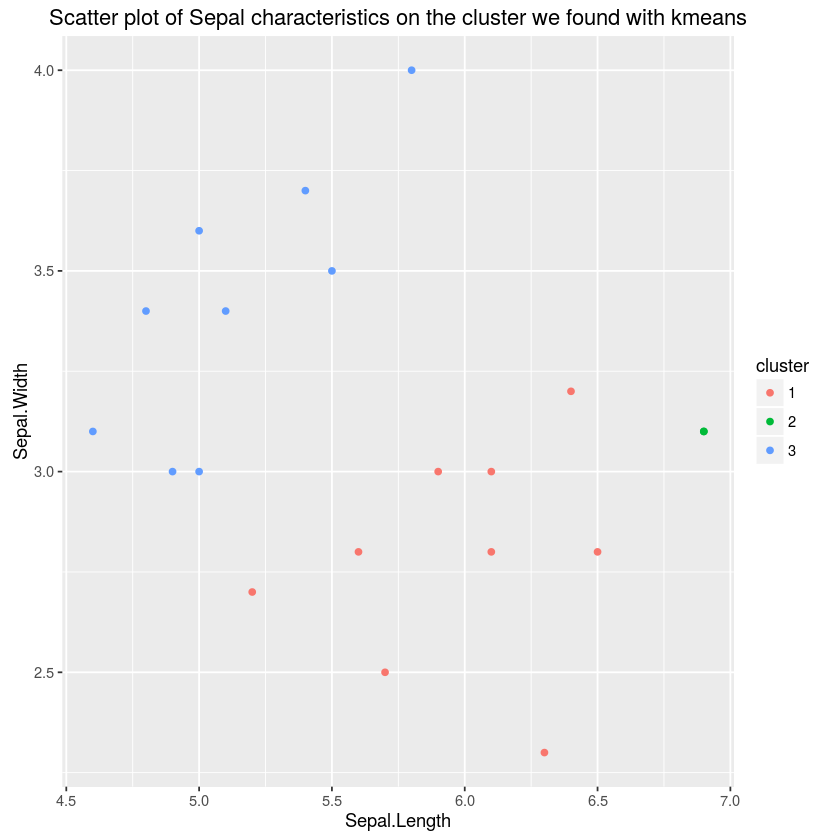

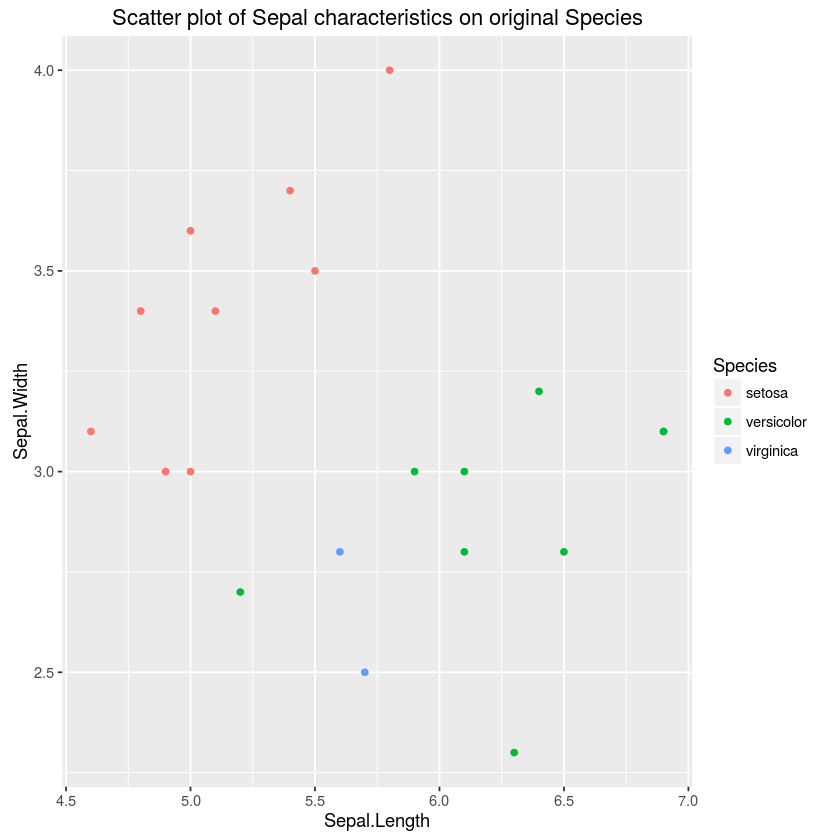

In [26]:
################# Predict on the "new" dataset ################################
iris$cluster= as.factor(cl_predict(mykmeans,newdata=iris[,1:4]))
############### and visualize results on "new" dataset "#####################
myplot1 = ggplot(data=iris[sample_id,],aes(x=Sepal.Length,y=Sepal.Width)) + geom_point(aes(colour=cluster))
myplot1 = myplot1 +ggtitle("Scatter plot of Sepal characteristics on the cluster we found with kmeans")
myplot2 = ggplot(data=iris[sample_id,],aes(x=Sepal.Length,y=Sepal.Width)) + geom_point(aes(colour=Species))
myplot2 = myplot2 +ggtitle("Scatter plot of Sepal characteristics on original Species")
myplot1
myplot2

### Conclusion: kmeans can reproduce structure of Species without knowing them a priori especially for Setosa species.